In [4]:
def format_dataframe(df):
    
    def auto_format(number):
        if isinstance(number, (int, float)):
            if abs(number) >= 1000 or (abs(number) < 0.001 and number != 0):
                return f"{number:.3e}"  # Экспоненциальный формат
            else:
                return f"{number:.3f}"  # Обычный формат
        return str(number)  # Если это не число, оставляем как есть
    
    return df.applymap(auto_format)



def tikz_convert(ax,
         clean = False, mktex = False, path = "", filename = "", caption = None):
    
    num = len(ax.get_axes()) 
    if num != 1:
        num = 2
    
    if filename == "":
        import uuid
        filename = str(uuid.uuid4()) + ".tex"
        
    if path == "":
        path = "../Obsidian"
    
    if mktex:
    
        import tikzplotlib as tikz

        def tikzplotlib_fix_ncols(obj):
            """
            workaround for matplotlib 3.6 renamed legend's _ncol to _ncols, which breaks tikzplotlib
            """
            if hasattr(obj, "_ncols"):
                obj._ncol = obj._ncols
            for child in obj.get_children():
                tikzplotlib_fix_ncols(child)

        tikzplotlib_fix_ncols(ax)
        if clean:
            ax = tikz.clean_figure(ax)
        
        tikz.save(f"{path}/{filename}", 
                axis_width = f"\\textwidth/{num} - 2cm",
                axis_height = "9cm")
    if caption:
        print(f"""
```text
\\begin{{figure}}[H]
\\centering
[[{filename}]]
\\caption({caption})
\\end{{figure}}
```""")
    else:
        print(f"""
```text
\\begin{{figure}}[H]
\\centering
[[{filename}]]
\\end{{figure}}
```""")
    
    return None


def format_dataframe(df):
    
    def auto_format(number):
        if isinstance(number, (int, float)):
            if abs(number) >= 1000 or (abs(number) < 0.001 and number != 0):
                return f"{number:.3e}"  # Экспоненциальный формат
            else:
                return f"{number:.3f}"  # Обычный формат
        return str(number)  # Если это не число, оставляем как есть
    
    return df.applymap(auto_format)

<>:25: SyntaxWarning: invalid escape sequence '\c'
<>:25: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_10870/2848289386.py:25: SyntaxWarning: invalid escape sequence '\c'
  label = f"$y = {popt[0]:.3f} \cdot x + {popt[1]:.3f}$")


,C,e
0,0.01,0.189
1,0.02,0.332
2,0.03,0.513
3,0.04,0.634
4,0.05,0.767


/tmp/ipykernel_10870/666454980.py:80: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df.applymap(auto_format)


|    |   C, мг/мл |     A |
|----|------------|-------|
|  0 |       0.01 | 0.189 |
|  1 |       0.02 | 0.332 |
|  2 |       0.03 | 0.513 |
|  3 |       0.04 | 0.634 |
|  4 |       0.05 | 0.767 |

```text
\begin{figure}[H]
\centering
[[фото.tex]]
\end{figure}
```


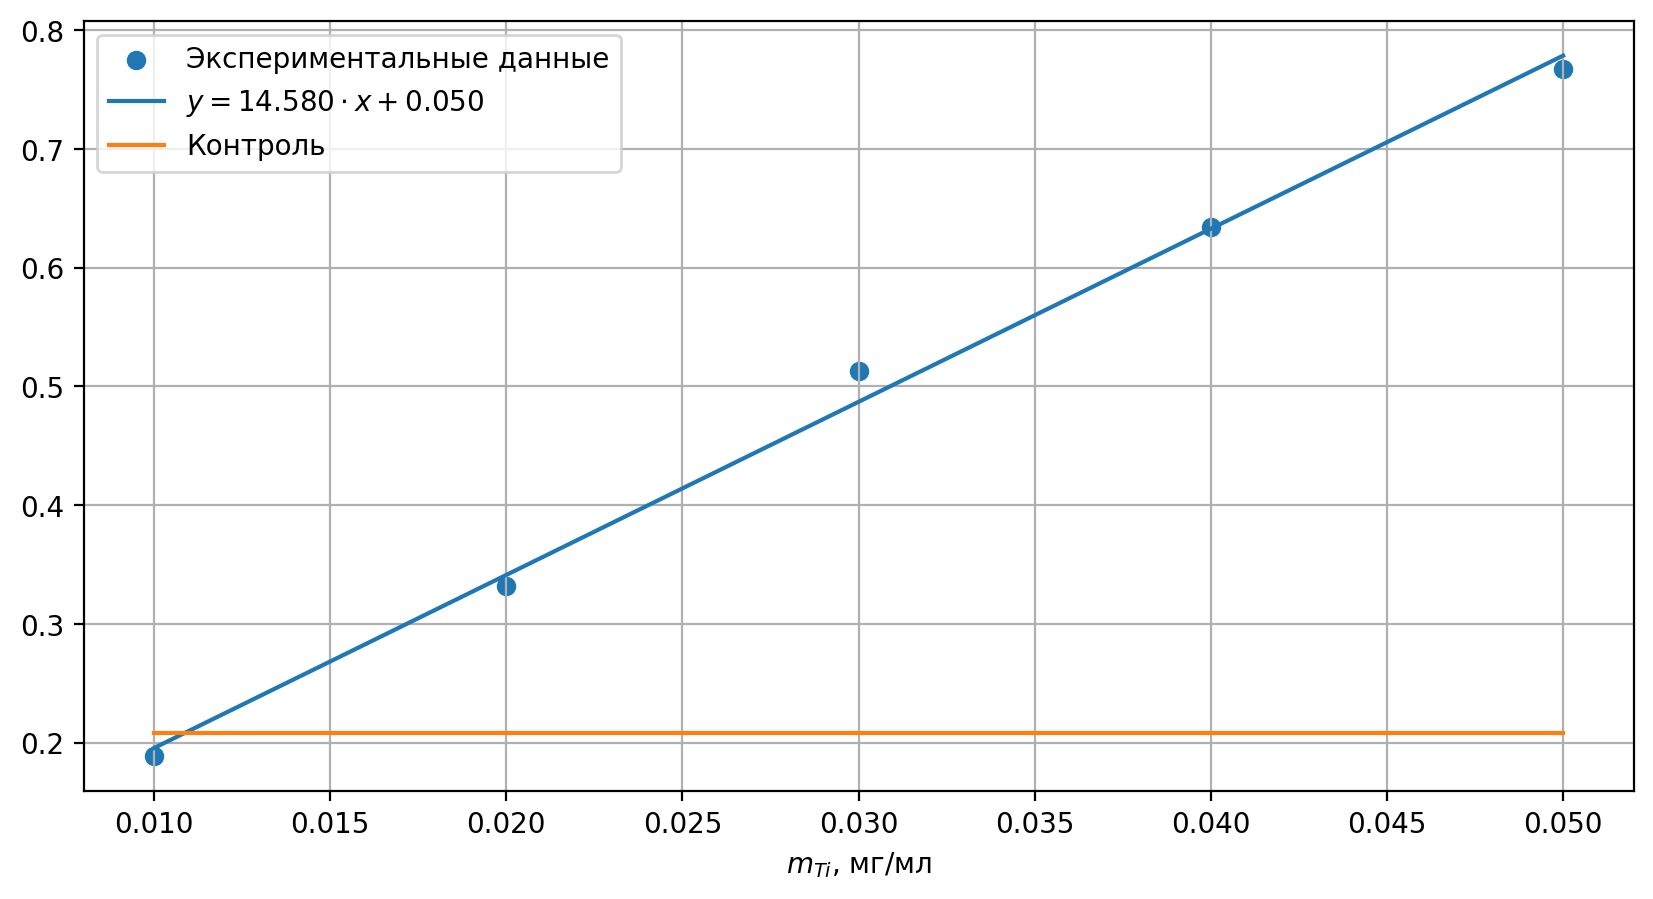

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from scipy.optimize import curve_fit
from tabulate import tabulate

df = pd.DataFrame({})
phon = 28.9
l =405
e_contr = 0.208


df["C"] = np.linspace(0.5,2.5,5)/50
df["e"] = [0.189, 0.332, 0.513, 0.634, 0.767]

display(df)

ax = plt.figure(figsize=(10,5), dpi = 200)
plt.scatter(df.C, df.e, label = "Экспериментальные данные")

popt, pcov = curve_fit(lambda x,k,b: k*x + b, 1*df.C, 1*df.e)
x = np.linspace(0.5/50,2.5/50, 2)
plt.plot(x, popt[0]*x + popt[1],
        label = f"$y = {popt[0]:.3f} \cdot x + {popt[1]:.3f}$")

plt.plot([0.01,0.05], [e_contr,e_contr], 
           label = "Контроль")
#plt.scatter(0.0109,e_contr)
plt.xlabel("$m_{Ti}$, мг/мл")
plt.ylabel("")
plt.grid()
plt.legend()


print(tabulate(format_dataframe(df),
              tablefmt = "github",
              headers = ["C, мг/мл", "A"]))


tikz_convert(ax,
         clean = False, mktex = True, path = "", filename = "фото.tex", caption = None)

In [45]:
df = pd.DataFrame({})

df["l"] = [390, 400, 405, 410, 415, 420, 430, 440]
df["e"] = [0.339, 0.165, 0.754, 0.713, 0.689, 0.660, 0.555, 0.359]

display(df)
print(tabulate(format_dataframe(df),
              tablefmt = "github",
              headers = ["$\lambda$, нм", "A"]))

Ti = 47.8670

<>:9: SyntaxWarning: invalid escape sequence '\l'
<>:9: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_22543/1869935588.py:9: SyntaxWarning: invalid escape sequence '\l'
  headers = ["$\lambda$, нм", "A"]))


,l,e
0,390,0.339
1,400,0.165
2,405,0.754
3,410,0.713
4,415,0.689
5,420,0.660
6,430,0.555
7,440,0.359


|    |   $\lambda$, нм |     A |
|----|-----------------|-------|
|  0 |             390 | 0.339 |
|  1 |             400 | 0.165 |
|  2 |             405 | 0.754 |
|  3 |             410 | 0.713 |
|  4 |             415 | 0.689 |
|  5 |             420 | 0.66  |
|  6 |             430 | 0.555 |
|  7 |             440 | 0.359 |


/tmp/ipykernel_22543/2590261366.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df.applymap(auto_format)
